In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [162]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Churn : Yes - Customer has left**

**Churn : No - Customer is retained**

# **EDA**

In [163]:
df.shape

(7043, 21)

In [164]:
columns=list(df.columns)
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [165]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [166]:
df.duplicated().sum()

np.int64(0)

In [167]:
df.drop_duplicates(inplace=True)

In [168]:
df['SeniorCitizen']=df['SeniorCitizen'].replace(0 , 'No')
df['SeniorCitizen']=df['SeniorCitizen'].replace(1 , 'Yes')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [169]:
df.drop(['customerID'] , axis=1 , inplace=True)

In [170]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
df['TotalCharges'].replace(' ' , 0 , inplace=True)

In [172]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [173]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [174]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [175]:
columns.remove('customerID')

In [176]:
numeric_features=[col for col in columns if df[col].dtypes!='object']
categorical_features=[col for col in columns if df[col].dtypes=='object']

In [177]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [178]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

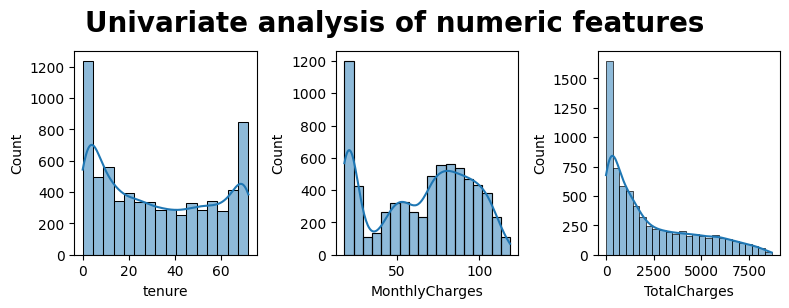

In [179]:
plt.figure(figsize=(8 , 8))
plt.suptitle("Univariate analysis of numeric features" , fontsize=20 , fontweight='bold')

for i in range(len(numeric_features)):
  plt.subplot(3 , 3 , i+1)
  sns.histplot(df[numeric_features[i]] , kde=True)
  plt.tight_layout()

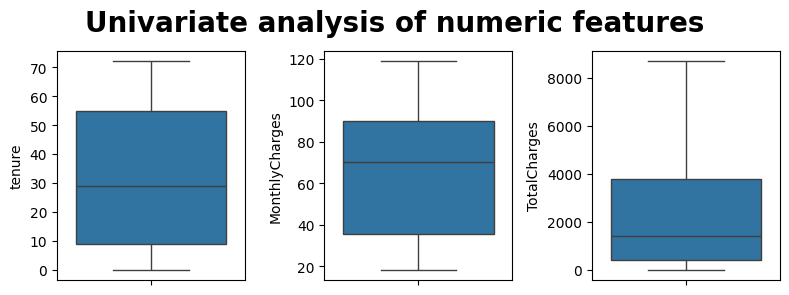

In [180]:
plt.figure(figsize=(8 , 8))
plt.suptitle("Univariate analysis of numeric features" , fontsize=20 , fontweight='bold')

for i in range(len(numeric_features)):
  plt.subplot(3 , 3 , i+1)
  sns.boxplot(df[numeric_features[i]])
  plt.tight_layout()

In [181]:
skew=df['TotalCharges'].skew()
type(skew)
# print(df['TotalCharges'].kurt())

numpy.float64

In [182]:
def get_skew_kurt(num_feature):

  skeweness=df[num_feature].skew()
  kurtosis=df[num_feature].kurt()

  print(f"Feature : {num_feature}")
  print(f"Skeweness : {skeweness}")
  print(f"Kurtosis : {kurtosis}")

  if skeweness > 0:
    print(f"{num_feature} is right skewed")
  else:
    print(f"{num_feature} is left skewed")

  if kurtosis > 3:
    print("Heavy tailed distribution with more outliers")
  else:
    print("Light tailed distribution with less outliers")
  print('='*50)
  print('\n')

In [183]:
for i in range(len(numeric_features)):
  get_skew_kurt(numeric_features[i])

Feature : tenure
Skeweness : 0.2395397495619829
Kurtosis : -1.387371635971685
tenure is right skewed
Light tailed distribution with less outliers


Feature : MonthlyCharges
Skeweness : -0.22052443394398033
Kurtosis : -1.2572596945495056
MonthlyCharges is left skewed
Light tailed distribution with less outliers


Feature : TotalCharges
Skeweness : 0.963234654832277
Kurtosis : -0.22857980712373127
TotalCharges is right skewed
Light tailed distribution with less outliers




In [184]:
  Q1=df['tenure'].quantile(0.25)
  Q3=df['tenure'].quantile(0.75)
  IQR=Q3-Q1

  outliers=df[(df['tenure']< (Q1-1.5*IQR)) | (df['tenure'] > (Q3 + 1.5*IQR))]
  print(outliers)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [185]:
def check_outliers(num_feature):

  Q1=df[num_feature].quantile(0.25)
  Q3=df[num_feature].quantile(0.75)
  IQR=Q3-Q1

  outliers=outliers=df[(df[num_feature]< (Q1-1.5*IQR)) | (df[num_feature] > (Q3 + 1.5*IQR))]
  print(outliers)
  print("="*50)
  print("\n")

In [186]:
for i in range(len(numeric_features)):
  check_outliers(numeric_features[i])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []




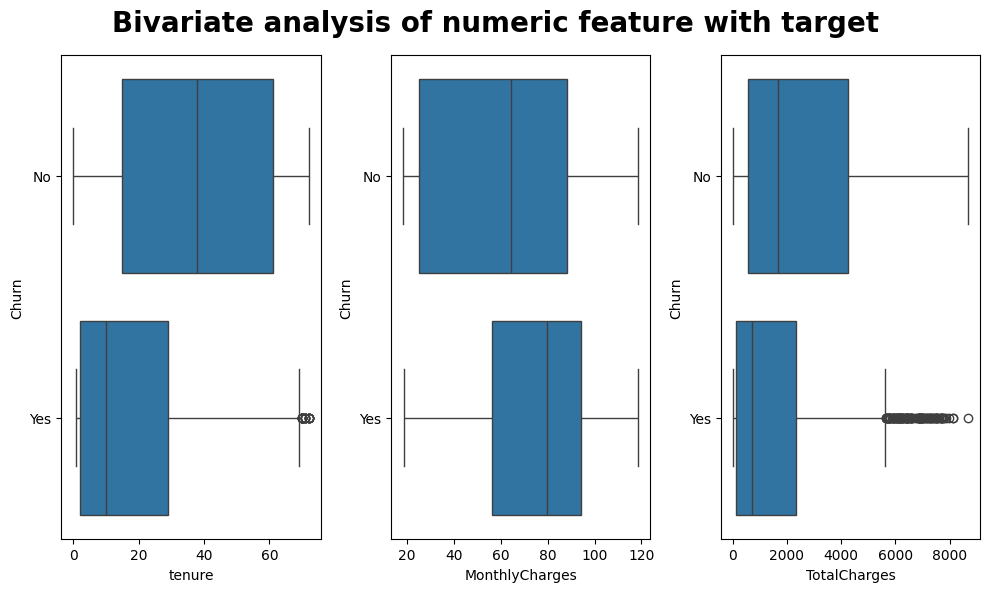

In [187]:
plt.figure(figsize=(10 , 6))
plt.suptitle('Bivariate analysis of numeric feature with target' , fontsize=20 , fontweight='bold')

for i in range(len(numeric_features)):
  plt.subplot(1 , 3, i+1)
  sns.boxplot(x=df[numeric_features[i]] , y=df['Churn'] , data=df)
  plt.tight_layout()

<Axes: >

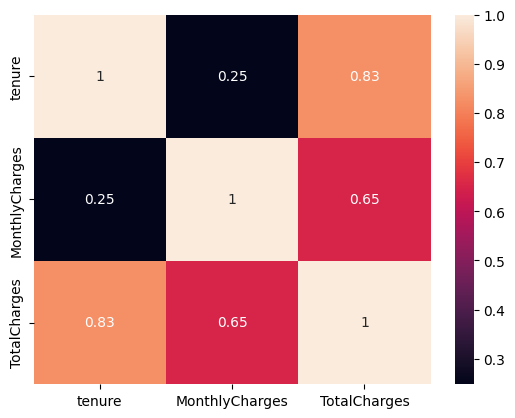

In [230]:
sns.heatmap(df[numeric_features].corr() , annot=True)

In [188]:
df.groupby('Churn')['tenure'].agg(['mean' , 'median' , 'sum' , 'count'])

,mean,median,sum,count
Churn,,,,
No,37.569965,38.0,194387,5174
Yes,17.979133,10.0,33603,1869


In [189]:
def bivariate_analysis_of_numeric_features(num_feature):
  print(f"Feature : {num_feature}")
  print(df.groupby('Churn')[num_feature].agg(['mean' , 'median' , 'sum' , 'count']))
  print("="*50)
  print('\n')

In [190]:
for i in range(len(numeric_features)):
  bivariate_analysis_of_numeric_features(numeric_features[i])

Feature : tenure
            mean  median     sum  count
Churn                                  
No     37.569965    38.0  194387   5174
Yes    17.979133    10.0   33603   1869


Feature : MonthlyCharges
            mean  median        sum  count
Churn                                     
No     61.265124  64.425  316985.75   5174
Yes    74.441332  79.650  139130.85   1869


Feature : TotalCharges
              mean    median         sum  count
Churn                                          
No     2549.911442  1679.525  13193241.8   5174
Yes    1531.796094   703.550   2862926.9   1869




In [191]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [192]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [193]:
from scipy.stats import pointbiserialr

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    corr, p_value = pointbiserialr(df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0), df[col])
    print(f'Correlation between {col} and Churn: {corr:.3f}')

Correlation between tenure and Churn: -0.352
Correlation between MonthlyCharges and Churn: 0.193
Correlation between TotalCharges and Churn: -0.198


1. **tenure vs Churn: -0.352**
Negative correlation means: as tenure increases, Churn decreases.

Interpretation: Customers who have been with the company longer are less likely to leave.

Business insight: Focus on retaining new customers—they are more likely to churn.

2. **MonthlyCharges vs Churn: +0.193**
Positive correlation means: as MonthlyCharges increase, Churn increases.

Interpretation: Customers who pay more per month are slightly more likely to leave.

Business insight: High-paying customers might feel they’re not getting value—consider offering them tailored offers or loyalty benefits.

3. **TotalCharges vs Churn: -0.198**
Negative correlation means: as TotalCharges increase, Churn decreases.

Interpretation: Customers who have paid more overall (i.e., been around longer) are less likely to churn.

Business insight: Long-term customers are loyal. Keep nurturing them, but again, focus retention efforts on newer customers.

In [194]:
categorical_features.pop()

'Churn'

In [195]:
print(categorical_features)
print(len(categorical_features))

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
16


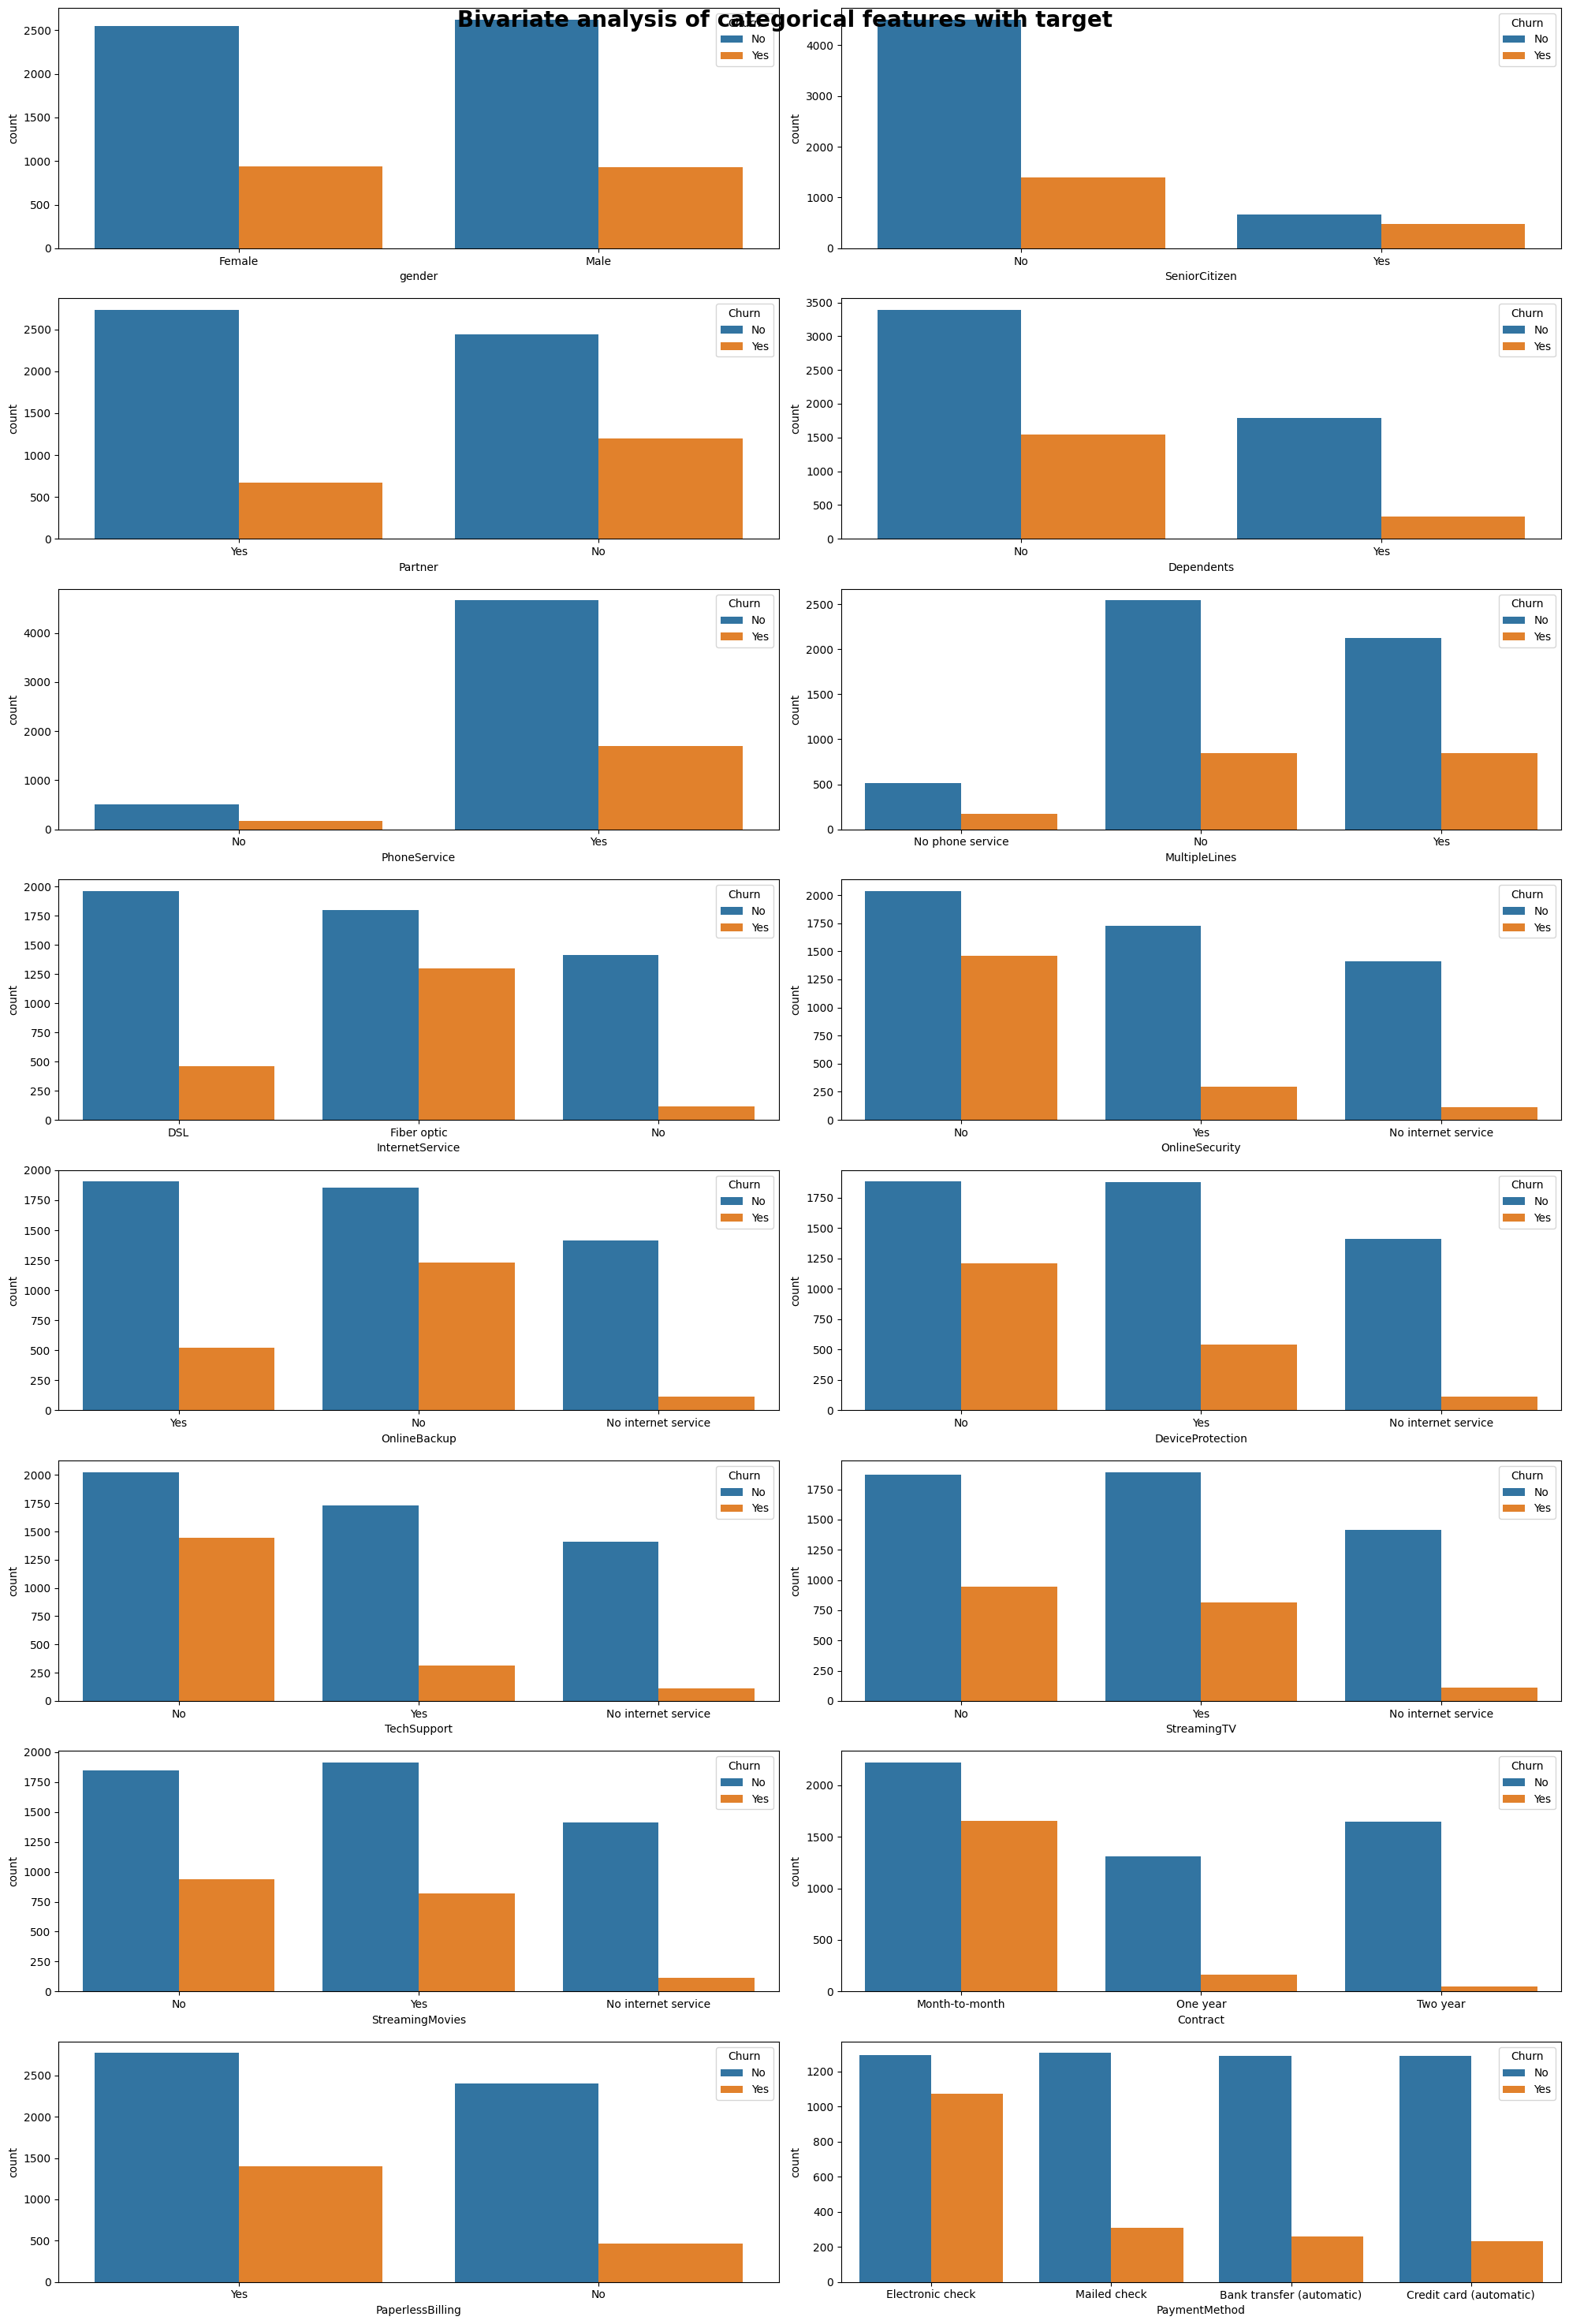

In [196]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20 , 30))
plt.suptitle("Bivariate analysis of categorical features with target" , fontsize=20 , fontweight='bold')

for i in range(len(categorical_features)):
  plt.subplot(8,2 , i+1)
  sns.countplot(x=df[categorical_features[i]] , hue='Churn' , data=df)
  plt.tight_layout()

In [197]:
def get_value_count(feature_name):
  print(feature_name)
  print('Overall data analysis')
  print(df[feature_name].value_counts())
  print('\n')
  print("Churned Customer data analysis")
  print(df[df['Churn']=='Yes'][feature_name].value_counts())
  print('\n')
  print("Retained Customer data analysis")
  print(df[df['Churn']=='No'][feature_name].value_counts())
  print("="*50)
  print("\n")

In [198]:
for i in range(len(categorical_features)):
  get_value_count(categorical_features[i])

gender
Overall data analysis
gender
Male      3555
Female    3488
Name: count, dtype: int64


Churned Customer data analysis
gender
Female    939
Male      930
Name: count, dtype: int64


Retained Customer data analysis
gender
Male      2625
Female    2549
Name: count, dtype: int64


SeniorCitizen
Overall data analysis
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


Churned Customer data analysis
SeniorCitizen
No     1393
Yes     476
Name: count, dtype: int64


Retained Customer data analysis
SeniorCitizen
No     4508
Yes     666
Name: count, dtype: int64


Partner
Overall data analysis
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Churned Customer data analysis
Partner
No     1200
Yes     669
Name: count, dtype: int64


Retained Customer data analysis
Partner
Yes    2733
No     2441
Name: count, dtype: int64


Dependents
Overall data analysis
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Churned Customer data analysis
Dependents
No     

**gender** : Number of churned customers are almost same for male and female

**SeniorCitizen** :Churn analysis by age group shows that while the majority of the customer base consists of non-senior citizens, they still account for a significant number of churns. Interestingly, the churn rate among senior citizens appears proportionally higher, suggesting age-specific service needs or dissatisfaction.

**Partner** : Customers without partners have a higher churn rate compared to those with partners. This suggests that having a partner may contribute to greater service stability or commitment, possibly due to shared decision-making or combined financial planning. Single individuals may be more price-sensitive or flexible in switching services.

**Dependents** :
Customers who do not have dependents are more likely to churn compared to those who have dependents.This may suggest that customers with dependents (e.g. families, children, elderly parents) tend to stay longer, possibly due to:a greater need for stable and uninterrupted service,or being more financially stable and committed to long-term contracts.On the other hand, customers without dependents may have more freedom to explore other service providers,contributing to their higher churn rate.

**PhoneServic** : PhoneService is not a strong indicator of churn.Both customers with and without PhoneService have churned, and the difference isn’t significant.The number of people without PhoneService is too small to draw meaningful insights.This feature might not be highly influential in predicting churn.

**MultipleLine** :Customers with multiple lines are more likely to churn than those with a single line.
This could be because multiple lines might indicate higher bills or shared plans, which can be affected by cost sensitivity or changing family/work dynamics.,

**InternetServic** : Fiber optic users are more likely to churn, suggesting possible dissatisfaction with service quality, pricing, or customer support. In contrast, DSL users show stronger retention, potentially due to more stable or affordable service. Customers with no internet service have the highest retention, possibly due to lower overall expectations or simpler service needs.

**OnlineSecurity**  : Lack of online security service is associated with higher churn, possibly due to customer concerns over safety or dissatisfaction with value. On the other hand, customers who opt for online security or don’t use the internet at all are more likely to stay, indicating that security features may contribute positively to customer retention.

**OnlineBackup** : Opting in for online backup services is associated with lower churn, indicating that such value-added services may increase customer satisfaction and loyalty. Customers not using this service may feel underserved or not see the value, contributing to churn.

**DeviceProtection'** : Device protection appears to be a factor in customer retention. Customers who opt for it are more likely to stay, possibly because they feel more secure and satisfied. In contrast, those without it show a much higher likelihood of leaving.,

**TechSupport** : Tech support is strongly correlated with customer retention. Customers who receive technical support feel more supported and are less likely to churn. On the other hand, those not using the service are churning at a much higher rate—this may suggest dissatisfaction or lack of assistance during technical issues.

**Contract** : Customers on monthly contracts are more likey to churn whereas the customers who have 1/2 year contarct are likely to retain,

**PaperlessBilling** : Majority of the people opt paperless billing and eventually they are likey to churn (bcz of there high number) . Customers who opted for PaperlessBilling have a significantly higher churn rate compared to those who didn't.
,

**PaymentMethod** : The customers who pay via electronic check are the one who churn the most . Wheresas the customers who pay via auto-credit card methods are the one who churn the least . Most reatined customers pay via mail checks .


 PhoneServic , gender , StreamingTV ,StreamingMovies

In [199]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [200]:
def get_detail_summary(feature_name):
  print(feature_name)
  summary=df.groupby(feature_name)['Churn'].value_counts().unstack().fillna(0)
  summary['Total']=summary.sum(axis=1)
  summary['Churn Rate%']=(summary['Yes']/summary['Total'])*100
  summary['Retainion Rate%']=(summary['No']/summary['Total'])*100
  print(summary)
  print("="*50)
  print('\n')

In [201]:
for i in range(len(categorical_features)):
  get_detail_summary(categorical_features[i])

gender
Churn     No  Yes  Total  Churn Rate%  Retainion Rate%
gender                                                
Female  2549  939   3488    26.920872        73.079128
Male    2625  930   3555    26.160338        73.839662


SeniorCitizen
Churn            No   Yes  Total  Churn Rate%  Retainion Rate%
SeniorCitizen                                                 
No             4508  1393   5901    23.606168        76.393832
Yes             666   476   1142    41.681261        58.318739


Partner
Churn      No   Yes  Total  Churn Rate%  Retainion Rate%
Partner                                                 
No       2441  1200   3641    32.957979        67.042021
Yes      2733   669   3402    19.664903        80.335097


Dependents
Churn         No   Yes  Total  Churn Rate%  Retainion Rate%
Dependents                                                 
No          3390  1543   4933    31.279140        68.720860
Yes         1784   326   2110    15.450237        84.549763


PhoneService

**StreamingTV**

Interpretation:
Customers without internet service (and hence no streaming) churn far less.

Among customers with internet, both Yes and No for streaming TV have similar churn rates (~30–33%), meaning having or not having streaming TV does not greatly impact churn.

Conclusion: StreamingTV has limited impact on churn — can be dropped or deprioritized in feature importance.

**StreamingMovies**
 Interpretation:
Same pattern: customers without internet churn less.

For customers with internet:

Whether or not they use StreamingMovies, churn rate is ~30–33% — very similar.

Conclusion: StreamingMovies, like StreamingTV, shows low correlation with churn and may not be valuable in a predictive model.

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
for col in df_model.select_dtypes('object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# print(importances[categorical_features])
print(pd.DataFrame(importances[categorical_features]))

                         0
gender            0.028031
SeniorCitizen     0.020558
Partner           0.023073
Dependents        0.019116
PhoneService      0.004800
MultipleLines     0.022179
InternetService   0.026396
OnlineSecurity    0.055947
OnlineBackup      0.027326
DeviceProtection  0.022840
TechSupport       0.033081
StreamingTV       0.016241
StreamingMovies   0.016714
Contract          0.078098
PaperlessBilling  0.024647
PaymentMethod     0.051321


In [214]:
Importance_df=pd.DataFrame(importances[categorical_features]).reset_index()
Importance_df.columns=['Feature' , 'Importance']
Importance_df=Importance_df.sort_values(by='Importance' , ascending=True).reset_index(drop=True)
Importance_df

,Feature,Importance
0,PhoneService,0.004800
1,StreamingTV,0.016241
2,StreamingMovies,0.016714
3,Dependents,0.019116
4,SeniorCitizen,0.020558
5,MultipleLines,0.022179
6,DeviceProtection,0.022840
7,Partner,0.023073
8,PaperlessBilling,0.024647
9,InternetService,0.026396


In [218]:
features_to_drop=list(Importance_df[Importance_df['Importance'] < 0.021]['Feature'])
features_to_drop

['PhoneService',
 'StreamingTV',
 'StreamingMovies',
 'Dependents',
 'SeniorCitizen']

In [220]:
df.groupby('gender')['Churn'].value_counts(normalize=True)

gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64

Both males and females churn at nearly the same rate (very close: ~26–27% churn).

The difference is less than 1%, which is statistically insignificant and unlikely to contribute meaningfully to your model.

In [222]:
features_to_drop.append('gender')
features_to_drop

['PhoneService',
 'StreamingTV',
 'StreamingMovies',
 'Dependents',
 'SeniorCitizen',
 'gender']

In [223]:
df.drop(features_to_drop , axis=1 , inplace=True )

In [224]:
df.head()

,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,1,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,45,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [225]:
df.shape

(7043, 14)

In [233]:
columns=list(df.columns)
columns

['Partner',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [244]:
df.to_csv("Clean_dataset.csv" , index=False)